# Horizontal bar charts in matplotlib

### Imports

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Example 1: using Titanic data

#### Prepare data

Let's make an horizontal bar charts of the survival rates by age and p-class

#### 1. Age

In [2]:
path = "C:\Users\JC\Desktop\dscamp\dscamp\CS109\HW\Data sets\\train.csv"

titanic = pd.read_csv(path)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


#### Let's create bins of 10 years so that we can have groups of 10 years

In [3]:
ages = titanic.Age.dropna()

bins = np.linspace(0,ages.max(),9)

def map_bin(x, bins):
    kwargs = {}
    if x == max(bins):
        kwargs['right'] = True
    bin = bins[np.digitize([x], bins, **kwargs)[0]]
    bin_lower = bins[np.digitize([x], bins, **kwargs)[0]-1]
    return '[{0}-{1}]'.format(bin_lower, bin)

titanic = titanic.dropna()

titanic["AgeBin"] = titanic.Age.apply(lambda x: map_bin(x,bins))
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,[30.0-40.0]
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,[30.0-40.0]
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,[50.0-60.0]
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S,[0.0-10.0]
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S,[50.0-60.0]


In [4]:
gtitanic = titanic.groupby(by = "AgeBin", as_index = False)
gtitanic.mean()

,AgeBin,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,[0.0-10.0],335.700000,0.800000,2.000000,2.892000,0.900000,1.300000,55.459580
1,[10.0-20.0],535.473684,0.789474,1.105263,17.105263,0.684211,0.894737,108.503289
2,[20.0-30.0],422.972222,0.750000,1.333333,24.972222,0.444444,0.555556,83.994561
3,[30.0-40.0],463.775510,0.755102,1.163265,34.775510,0.387755,0.346939,85.281378
4,[40.0-50.0],489.090909,0.575758,1.060606,45.287879,0.424242,0.151515,61.346597
5,[50.0-60.0],458.458333,0.541667,1.041667,53.958333,0.375000,0.333333,72.655900
6,[60.0-70.0],359.111111,0.333333,1.000000,62.333333,0.444444,0.666667,75.145367
7,[70.0-80.0],491.333333,0.333333,1.000000,73.666667,0.333333,0.333333,45.218067


#### Ready to draw the bar chart

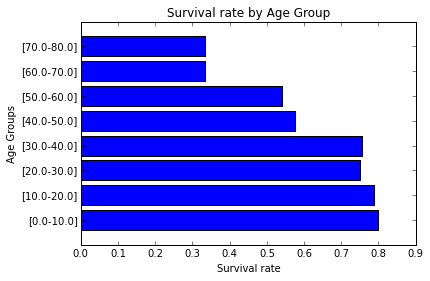

In [5]:
fig, ax = plt.subplots()

width = 0.8
labels = gtitanic.mean().AgeBin.tolist()

yTickPos = np.arange(len(gtitanic.AgeBin))
yBarPos = yTickPos - width/2
data = gtitanic.mean().Survived.tolist()

ax.barh(yBarPos, data)

ax.set_yticks(yTickPos)
ax.set_yticklabels(labels)
ax.set_ylabel("Age Groups")
ax.set_xlabel("Survival rate")
ax.set_title("Survival rate by Age Group")

#### 2. Pclass

In [6]:
path = "C:\Users\JC\Desktop\dscamp\dscamp\CS109\HW\Data sets\\train.csv"

titanic = pd.read_csv(path)

g2titanic = titanic.groupby(by="Pclass", as_index = False)
g2titanic.mean()

,Pclass,PassengerId,Survived,Age,SibSp,Parch,Fare
0,1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
1,2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
2,3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


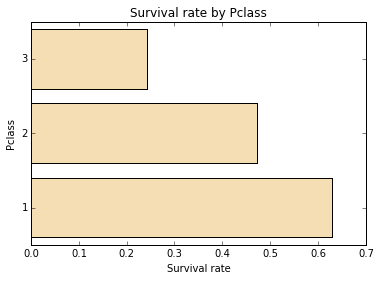

In [7]:
fig, ax = plt.subplots()
width = 0.8
labels = g2titanic.mean().Pclass.tolist()

data = np.arange(len(labels))
yTickPos = np.arange(len(data))
yBarPos = yTickPos - width/2

ax.barh(yBarPos, g2titanic.mean().Survived, color = "wheat")

ax.set_yticks(yTickPos)
ax.set_yticklabels(labels)
ax.set_ylabel("Pclass")
ax.set_xlabel("Survival rate")
ax.set_title("Survival rate by Pclass")

### Example 2: Using 2012 US Presidential Election data

In [8]:
from StringIO import StringIO
import requests

url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
source = requests.get(url).text
s = StringIO(source)
election = pd.DataFrame.from_csv(s, index_col=None).convert_objects(
            convert_dates="coerce", convert_numeric=True) # Access polls as a CSV file

c:\python27\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


#### Prepare the dataframe

#### Group by Pollster

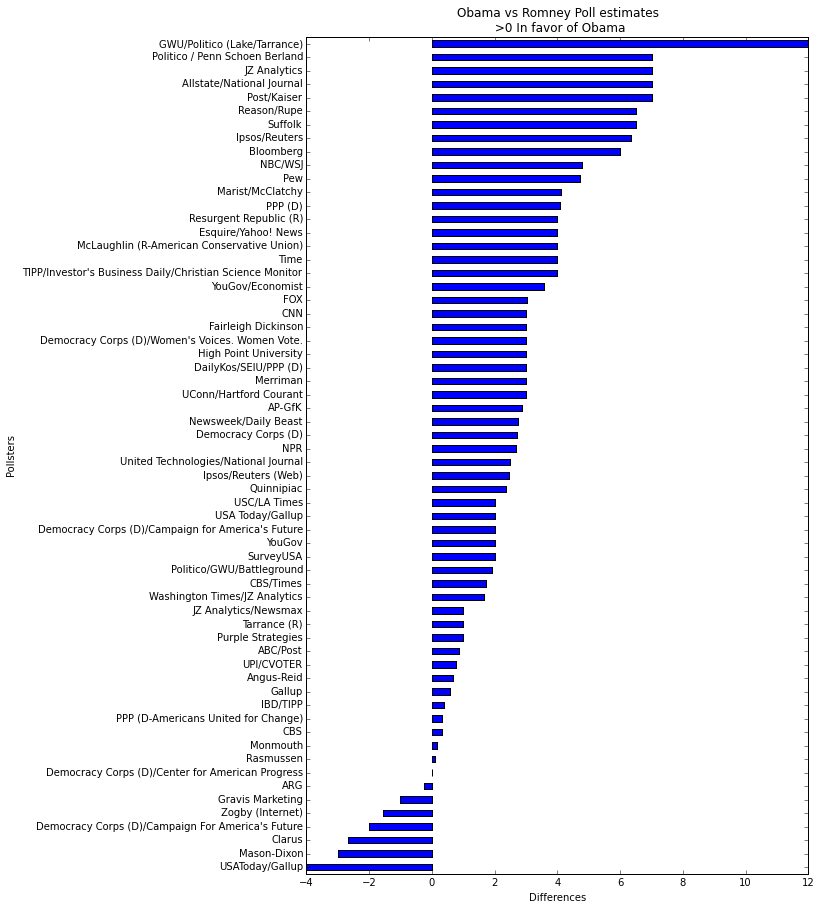

In [9]:
election["Diff"] = election["Obama"] - election["Romney"]
gelection = election.groupby(by = "Pollster")
gelection.mean().sort_values(by="Diff")["Diff"].plot(kind = "barh", figsize =(9,15))

plt.title("Obama vs Romney Poll estimates \n >0 In favor of Obama")
plt.ylabel("Pollsters")
plt.xlabel("Differences")